# Kraggle Competition - Titanic 

## Load data

### Unzip

In [1]:
# from zipfile import ZipFile

In [2]:
# with ZipFile('./data/raw/titanic.zip', 'r') as zip:
#     zip.extractall('./data/interim')

### Read CSVs

In [3]:
BASE = './data/interim/'
TRAIN_CSV = BASE + 'train.csv'
TEST_CSV = BASE + 'test.csv'

In [4]:
import pandas as pd

#### Train

In [5]:
df_train_raw = pd.read_csv(TRAIN_CSV)
df_train = df_train_raw.copy()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Test

In [6]:
df_test_raw = pd.read_csv(TEST_CSV)
df_test = df_test_raw.copy()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

* Unify train and test dataframes

In [8]:
df_passengers = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
df_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [10]:
df_passengers.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
df_passengers['Survived'].value_counts(normalize=True) * 100

Survived
0.0    61.616162
1.0    38.383838
Name: proportion, dtype: float64

In [12]:
df_passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


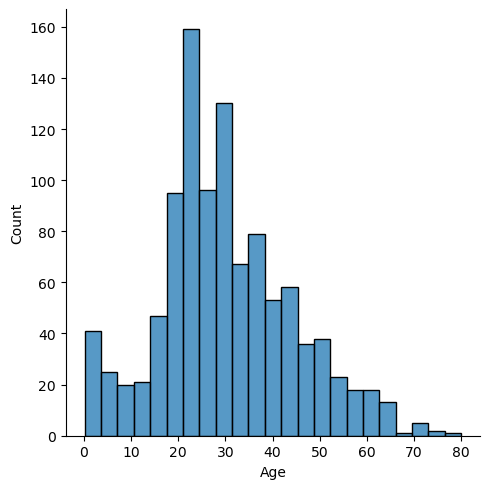

In [13]:
sns.displot(df_passengers['Age'])

<Axes: xlabel='Pclass', ylabel='count'>

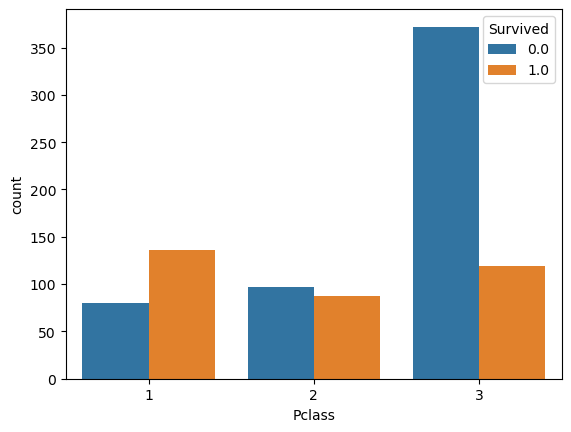

In [14]:
sns.countplot(df_passengers,
              x='Pclass',
              hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

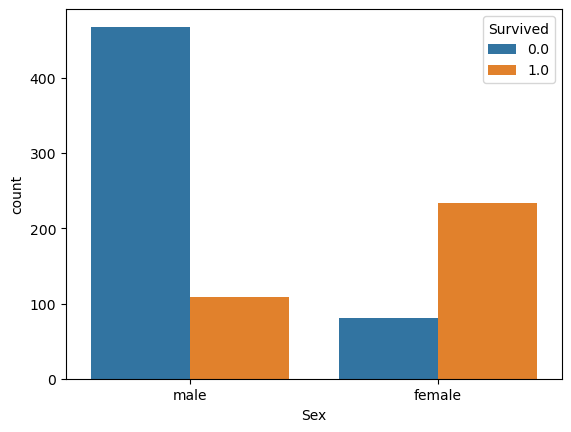

In [15]:
sns.countplot(df_passengers,
            x='Sex',
            hue='Survived')

<Axes: xlabel='Survived', ylabel='Age'>

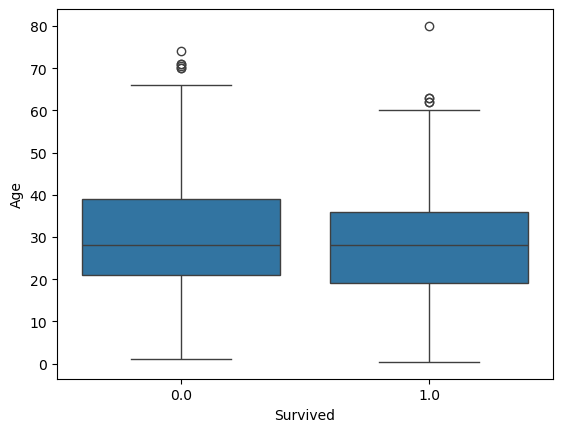

In [16]:
sns.boxplot(df_passengers, 
            y='Age', 
            x='Survived')

## Data hangling

* Drop `Name`, `Ticket`, `Age` and `Cabin` columns

In [17]:
df_test.drop(['Name', 'Ticket', 'Age', 'Cabin'], axis=1, inplace=True)
df_train.drop(['Name', 'Ticket', 'Age', 'Cabin'], axis=1, inplace=True)

* Drop `nan` from train and test dataframes (Two `Embarked` in train and one `Fare` in test)

In [18]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

* Reset index for `train` and `test` dataframes

In [19]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.7+ KB


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    object 
 3   SibSp        417 non-null    int64  
 4   Parch        417 non-null    int64  
 5   Fare         417 non-null    float64
 6   Embarked     417 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 22.9+ KB


### Save data transformed

In [22]:
SAVE_PATH_BASE = './data/processed/'

In [23]:
df_test.to_csv(SAVE_PATH_BASE + 'test.csv')

In [24]:
df_train.to_csv(SAVE_PATH_BASE + 'train.csv')

* Split dataframes into `X` and `Y`

In [25]:
X = df_train.drop(['PassengerId', 'Survived'], axis=1)
Y = df_train['Survived'].copy()

* Identify categorical columns

In [26]:
[X[column].unique() for column in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]

[array([3, 1, 2]),
 array(['male', 'female'], dtype=object),
 array([1, 0, 3, 4, 2, 5, 8]),
 array([0, 1, 2, 5, 3, 4, 6]),
 array(['S', 'C', 'Q'], dtype=object)]

In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

* Use OneHotEncoder to generate dummies for categorical columns creating a transformer

In [28]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']),
    remainder='passthrough',
    sparse_threshold=0
)

In [29]:
X = one_hot.fit_transform(X)

In [30]:
one_hot.get_feature_names_out()

array(['onehotencoder__Pclass_1', 'onehotencoder__Pclass_2',
       'onehotencoder__Pclass_3', 'onehotencoder__Sex_male',
       'onehotencoder__SibSp_0', 'onehotencoder__SibSp_1',
       'onehotencoder__SibSp_2', 'onehotencoder__SibSp_3',
       'onehotencoder__SibSp_4', 'onehotencoder__SibSp_5',
       'onehotencoder__SibSp_8', 'onehotencoder__Parch_0',
       'onehotencoder__Parch_1', 'onehotencoder__Parch_2',
       'onehotencoder__Parch_3', 'onehotencoder__Parch_4',
       'onehotencoder__Parch_5', 'onehotencoder__Parch_6',
       'onehotencoder__Embarked_C', 'onehotencoder__Embarked_Q',
       'onehotencoder__Embarked_S', 'remainder__Fare'], dtype=object)

In [31]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out()).head()

,onehotencoder__Pclass_1,onehotencoder__Pclass_2,onehotencoder__Pclass_3,onehotencoder__Sex_male,onehotencoder__SibSp_0,onehotencoder__SibSp_1,onehotencoder__SibSp_2,onehotencoder__SibSp_3,onehotencoder__SibSp_4,onehotencoder__SibSp_5,...,onehotencoder__Parch_1,onehotencoder__Parch_2,onehotencoder__Parch_3,onehotencoder__Parch_4,onehotencoder__Parch_5,onehotencoder__Parch_6,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,remainder__Fare
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.2500
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,71.2833
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.9250
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.1000
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0500


In [32]:
Y = LabelEncoder().fit_transform(Y)

## Modeling

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_val, y_train, y_val = train_test_split(X, Y,
                                                  random_state=0,
                                                  test_size=.25,
                                                  stratify=Y)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier

In [59]:
model_dummy = DummyClassifier(random_state=0)
model_dummy.fit(x_train, y_train)
y_hat_dummy = model_dummy.predict(x_val)

In [54]:
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2]
}

In [55]:
grid_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                       param_grid=param_grid,
                       scoring='accuracy',
                       cv=StratifiedKFold(5, 
                                          random_state=0,
                                          shuffle=True, ),
                       n_jobs=-1)

In [56]:
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='accuracy')

In [49]:
y_hat = grid_cv.predict(x_val)

## Model valuation

In [39]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

* Dummy predictions score

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       138
           1       0.00      0.00      0.00        85

    accuracy                           0.62       223
   macro avg       0.31      0.50      0.38       223
weighted avg       0.38      0.62      0.47       223



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


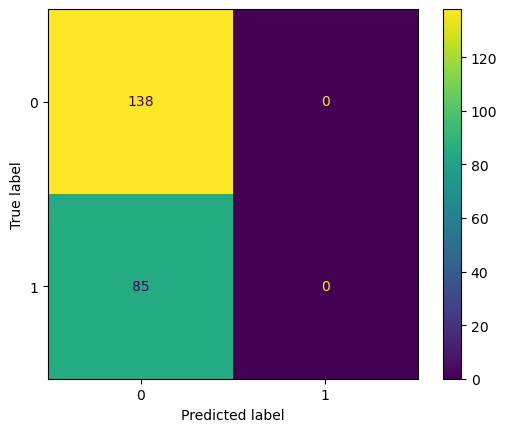

In [60]:
print(classification_report(y_val, y_hat_dummy))
ConfusionMatrixDisplay.from_predictions(y_val, y_hat_dummy)

* Best RandomForestClassifier model from GridSeachCV predictions score

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       138
           1       0.75      0.67      0.71        85

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



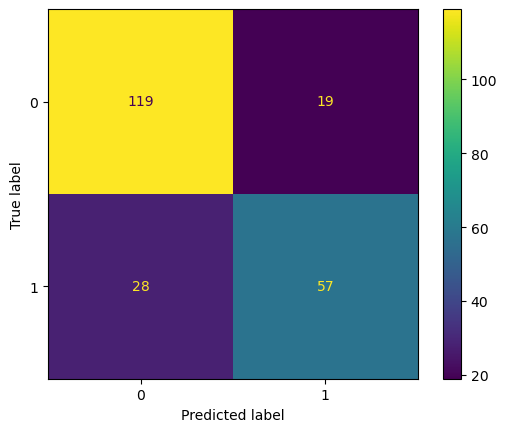

In [61]:
print(classification_report(y_val, y_hat))
ConfusionMatrixDisplay.from_predictions(y_val, y_hat)